### Import necessary packages

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

fuel_fusion_df = pd.read_csv("2024.02_Centuri_Fuel_Transactions_All_Accounts.csv")

C:\Users\sathv\AppData\Local\Temp\ipykernel_49348\375220796.py:6: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  fuel_fusion_df = pd.read_csv("2024.02_Centuri_Fuel_Transactions_All_Accounts.csv")


In [121]:
fuel_fusion_df.head()

,Account Code,Customer ID,Transaction Number,Transaction Date,Transaction Time,Posted Date,Reporting Level,Merchant Code,Merchant Name,Merchant Addr Line1 Desc,...,Gross Cost,Discount,Unnamed: 35,Rebate,Net Cost,Reviewed,Transaction Month,Transaction Year,Transaction Hour,Day of Week
0,CE471,BTXCJ,244212.0,2024-02-06,2024-04-25 15:24:00,02-08-2024,F,MC904,11026 - 9501 BLAKE L,9501 BLAKE LANE,...,69.90,0.0,$0.00,$0.00,$69.90,N,2,2024,15,1
1,CE471,BQRSY,478760.0,2024-02-06,2024-04-25 14:09:15,02-06-2024,F,IL867,11900 MARSHFIELD STATION INC,11900 S MARSHFIELD AVE,...,132.00,0.0,$0.00,$0.00,$132.00,N,2,2024,14,1
2,CE471,BQRSY,599442.0,2024-02-09,2024-04-25 14:04:22,02-09-2024,F,IL867,11900 MARSHFIELD STATION INC,11900 S MARSHFIELD AVE,...,122.00,0.0,$0.00,$0.00,$122.00,N,2,2024,14,4
3,CE471,BQRSY,608783.0,2024-02-01,2024-04-25 14:39:12,02-01-2024,F,IL867,11900 MARSHFIELD STATION INC,11900 S MARSHFIELD AVE,...,163.00,0.0,$0.00,$0.00,$163.00,N,2,2024,14,3
4,CE470,BXCMF,139660.0,2024-02-18,2024-04-25 10:14:48,02-19-2024,F,MC904,146 TRAVEL CENTER,5060 STATE HWY 146 S,...,105.86,0.0,$0.00,$0.00,$105.86,N,2,2024,10,6


#  Data Preprocessing

### check total number of null values

In [31]:
print(fuel_fusion_df.isnull().sum())


Account Code                    3
Customer ID                     3
Transaction Number              3
Transaction Date                3
Transaction Time                3
Posted Date                     3
Reporting Level                 3
Merchant Code                   3
Merchant Name                   3
Merchant Addr Line1 Desc        3
Merchant City                   3
Merchant State                  3
Merchant Postal Code            3
Vehicle Number                624
Card Number                     3
Cardholder First Name           3
Cardholder Last Name            3
Employee Number                 3
Trip Number                 28974
MCC Category                 2834
Driver License Number       20635
Driver License State        27486
License Plate Number        28926
ID Number                       6
POS First Name              16203
POS Last Name               16203
Odometer                        3
Trailer Number              28974
Miles Driven                    3
Cost Per Mile 

### drop collumns with all null values

In [37]:
fuel_fusion_df = fuel_fusion_df.dropna(axis=1, how='all')


### change the date and time column datatype into datetime format

In [71]:
fuel_fusion_df['Transaction Date'] = pd.to_datetime(fuel_fusion_df['Transaction Date'])
fuel_fusion_df['Transaction Time'] = pd.to_datetime(fuel_fusion_df['Transaction Time'])
fuel_fusion_df['Transaction Month'] = fuel_fusion_df['Transaction Date'].dt.month
fuel_fusion_df['Transaction Year'] = fuel_fusion_df['Transaction Date'].dt.year
fuel_fusion_df.dropna(subset=['Transaction Month'], inplace=True)
fuel_fusion_df['Transaction Month'] = fuel_fusion_df['Transaction Month'].astype(int)
fuel_fusion_df['Transaction Year'] = fuel_fusion_df['Transaction Year'].astype(int)


### Change datatpe of Gross cost from object into integer

In [63]:
fuel_fusion_df['Gross Cost'] = fuel_fusion_df['Gross Cost'].str.replace(r'[$\(\),]', '', regex=True).astype(float)
fuel_fusion_df['Gross Cost'].astype(int)

0         69
1        132
2        122
3        163
4        105
        ... 
28966     96
28967     68
28968     79
28969     50
28970     81
Name: Gross Cost, Length: 28971, dtype: int32

In [114]:
fuel_fusion_df['Discount'] = fuel_fusion_df['Discount'].astype(str)
fuel_fusion_df['Discount'] = fuel_fusion_df['Discount'].str.replace(r'[$\(\),]', '', regex=True).astype(float)
fuel_fusion_df['Discount']

0        0.00
1        0.00
2        0.00
3        0.00
4        0.00
         ... 
28966    0.00
28967    0.00
28968    0.00
28969    0.14
28970    0.00
Name: Discount, Length: 28971, dtype: float64

In [128]:
fuel_fusion_df['Cost Per Mile'] = fuel_fusion_df['Cost Per Mile'].astype(str)
fuel_fusion_df['Cost Per Mile'] = fuel_fusion_df['Cost Per Mile'].str.replace(r'[$\(\),]', '', regex=True).astype(float)
fuel_fusion_df = fuel_fusion_df[fuel_fusion_df['Cost Per Mile'] != 0.0]
fuel_fusion_df['Cost Per Mile']


6        0.27
9        0.15
10       0.14
12       0.39
18       0.20
         ... 
28962    0.09
28964    0.77
28967    0.30
28968    0.30
28970    0.37
Name: Cost Per Mile, Length: 7897, dtype: float64

# Data Visualisation

### Top 10 Customers based on Transaction Cost

In [73]:
customer_transactions = fuel_fusion_df.groupby('Customer ID')['Gross Cost'].sum().reset_index()

# Top customers by transaction amount
top_customers = customer_transactions.nlargest(10, 'Gross Cost')
print(top_customers)

   Customer ID  Gross Cost
34       BXCMF  1045815.59
9        AGBZF   145030.16
36       BXCR5   125071.57
27       BTXCJ   121908.00
12       BK7ZV   117641.63
26       BQRSZ   108158.33
18       BQHBZ    96226.59
56       DEZ03    82592.99
23       BQHC9    81869.01
39       BXYL5    74110.40


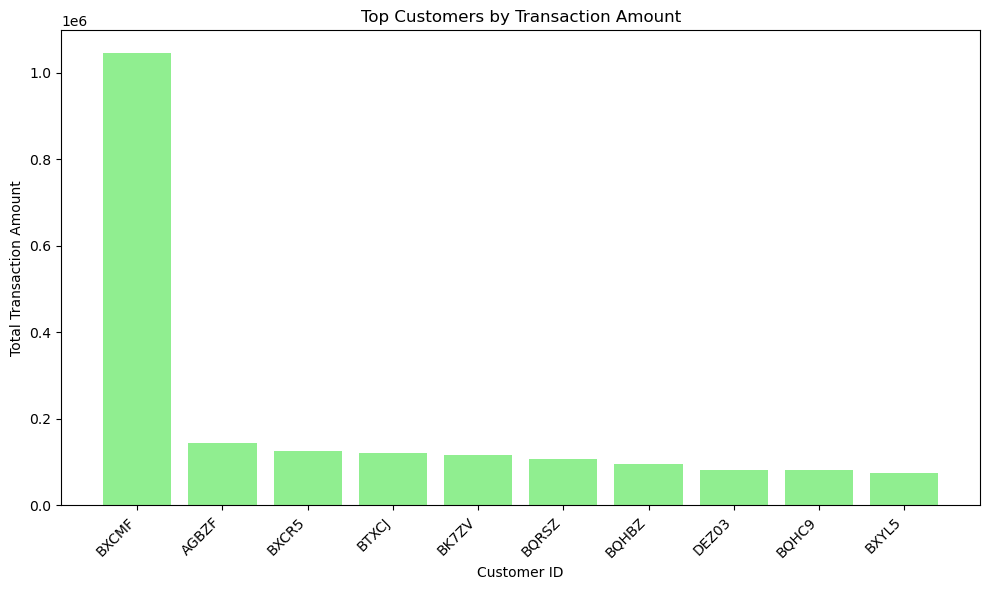

In [117]:
plt.figure(figsize=(10, 6))

plt.bar(top_customers['Customer ID'], top_customers['Gross Cost'], color='lightgreen')

# Add title and labels
plt.title('Top Customers by Transaction Amount')
plt.xlabel('Customer ID')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Total Transaction of Gross cost Month wise

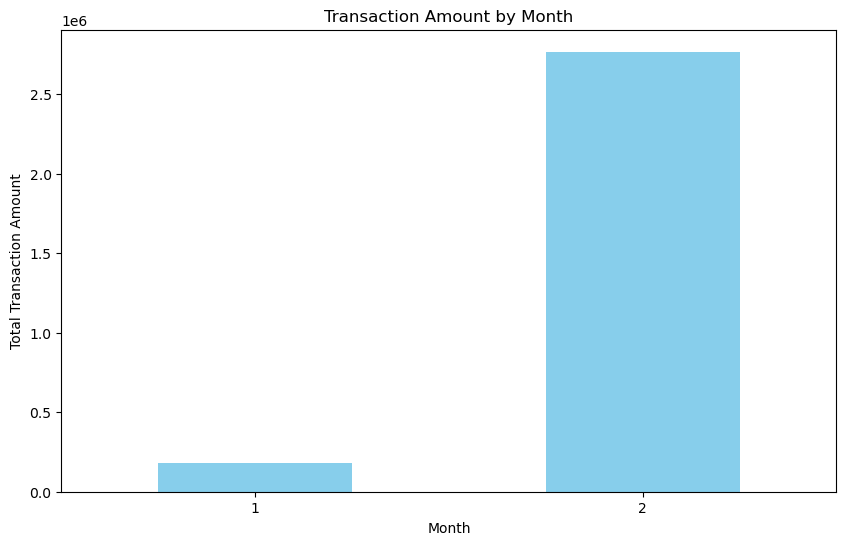

In [68]:

# Group by Transaction Month and sum the Gross Cost
monthly_transaction_amount = fuel_fusion_df.groupby('Transaction Month')['Gross Cost'].sum()

# Plot the graph
plt.figure(figsize=(10, 6))
monthly_transaction_amount.plot(kind='bar', color='skyblue')
plt.title('Transaction Amount by Month')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=0)
plt.show()

### Discount by various Merchants

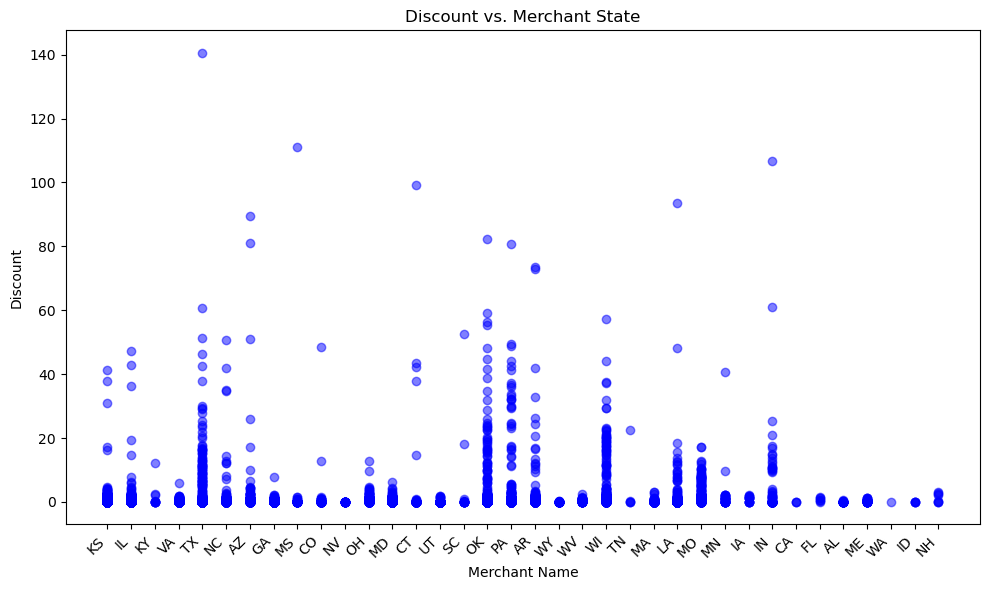

In [129]:
plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(fuel_fusion_df['Merchant State'], fuel_fusion_df['Discount'], alpha=0.5, color='blue')

# Add title and labels
plt.title('Discount vs. Merchant State')
plt.xlabel('Merchant Name')
plt.ylabel('Discount')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

### Top Merchants with least Cost per mile price 

               Merchant Name  Cost Per Mile
1110     INGLES GAS EXP #489           0.01
2303    SHELL OIL10007683021           0.02
69    ALLIED COOPERA09878737           0.03
2170   SHELL OIL 12637381018           0.03
516          CHEVRON 0053336           0.04
592          CHEVRON 0383884           0.04
1766                   QT 19           0.04
2660                 ZIGGY'S           0.04
1741         QT 1422 OUTSIDE           0.05
12            7-ELEVEN 10787           0.05


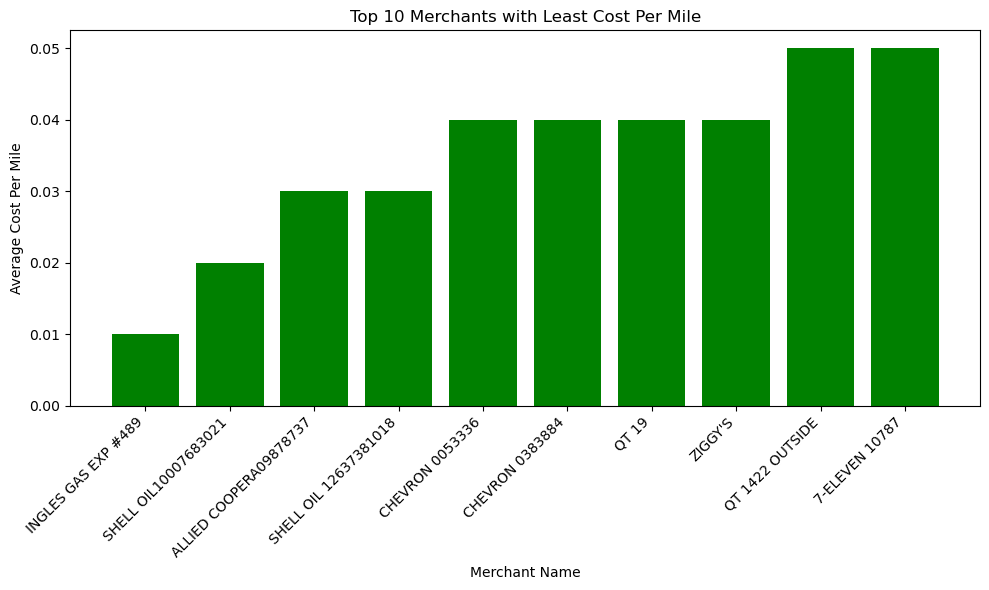

In [127]:

avg_cost_per_mile = fuel_fusion_df.groupby('Merchant Name')['Cost Per Mile'].mean().reset_index()

top_10_least_cost_per_mile = avg_cost_per_mile.nsmallest(10, 'Cost Per Mile')
print(top_10_least_cost_per_mile)

plt.figure(figsize=(10, 6))

plt.bar(top_10_least_cost_per_mile['Merchant Name'], top_10_least_cost_per_mile['Cost Per Mile'], color='green')
plt.title('Top 10 Merchants with Least Cost Per Mile')
plt.xlabel('Merchant Name')
plt.ylabel('Average Cost Per Mile')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


### Transaction frequency of Gross cost  by hour

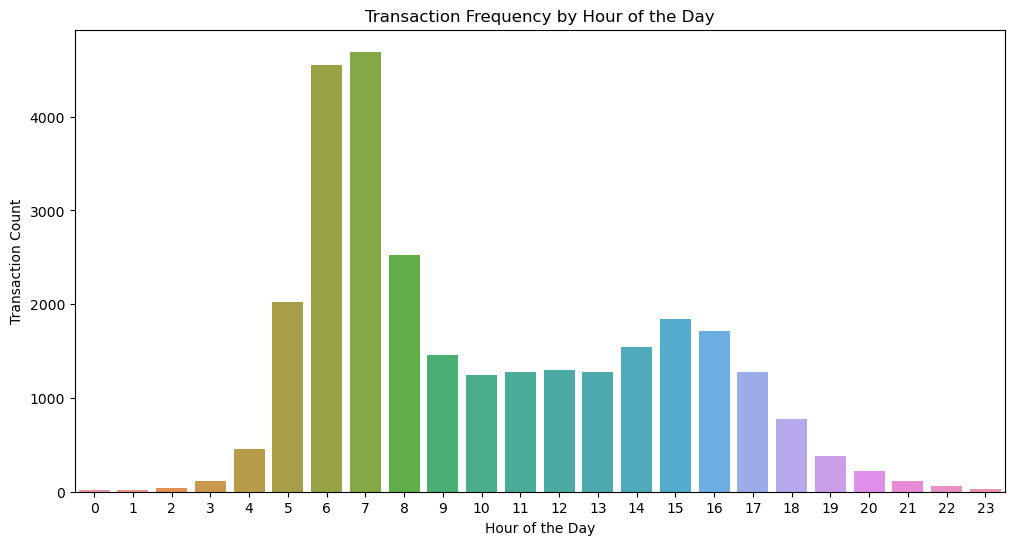

In [72]:
fuel_fusion_df['Transaction Hour'] = fuel_fusion_df['Transaction Time'].dt.hour
fuel_fusion_df['Day of Week'] = fuel_fusion_df['Transaction Date'].dt.dayofweek

# Transaction frequency by hour
plt.figure(figsize=(12, 6))
sns.countplot(x='Transaction Hour', data=fuel_fusion_df)
plt.title('Transaction Frequency by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Count')
plt.show()

### Transation cost by Merchant State 

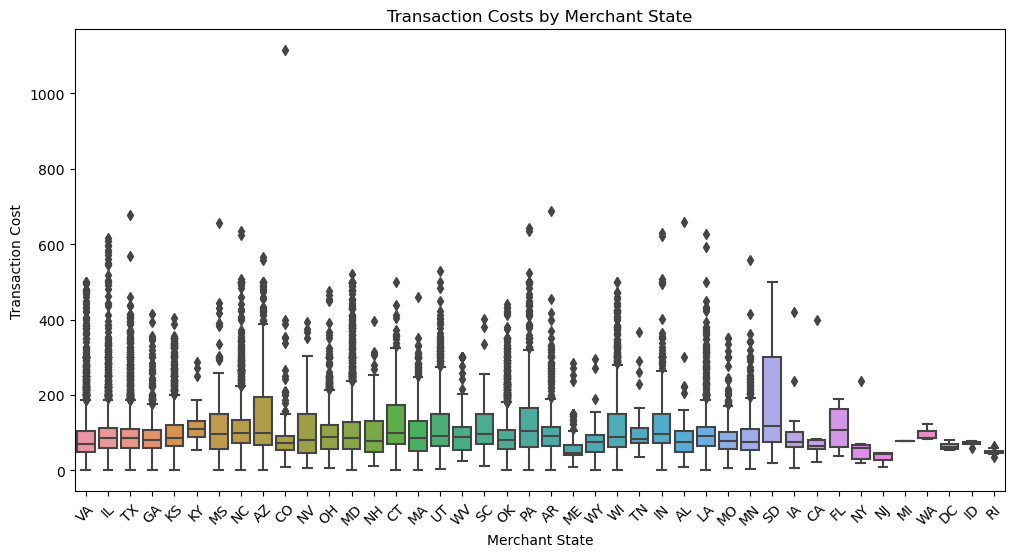

In [69]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Merchant State', y='Gross Cost', data=fuel_fusion_df)
plt.title('Transaction Costs by Merchant State')
plt.xlabel('Merchant State')
plt.ylabel('Transaction Cost')
plt.xticks(rotation=45)
plt.show()

### Corelation Matrix

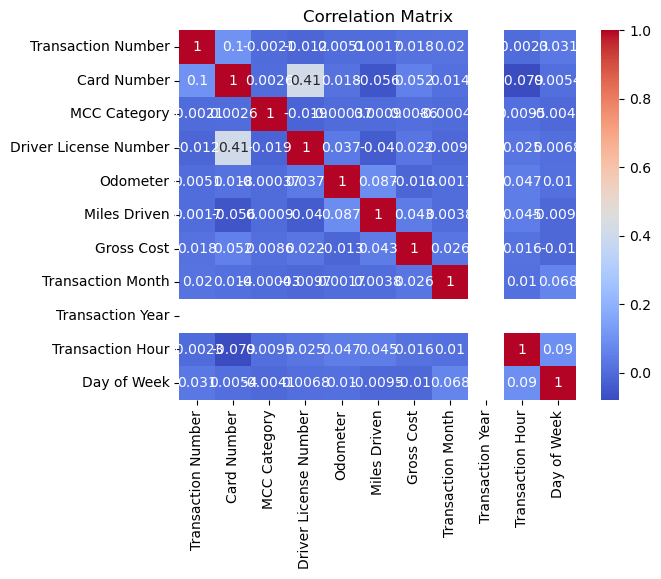

In [74]:
correlation_matrix = fuel_fusion_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Count of Transactions by MCC Category

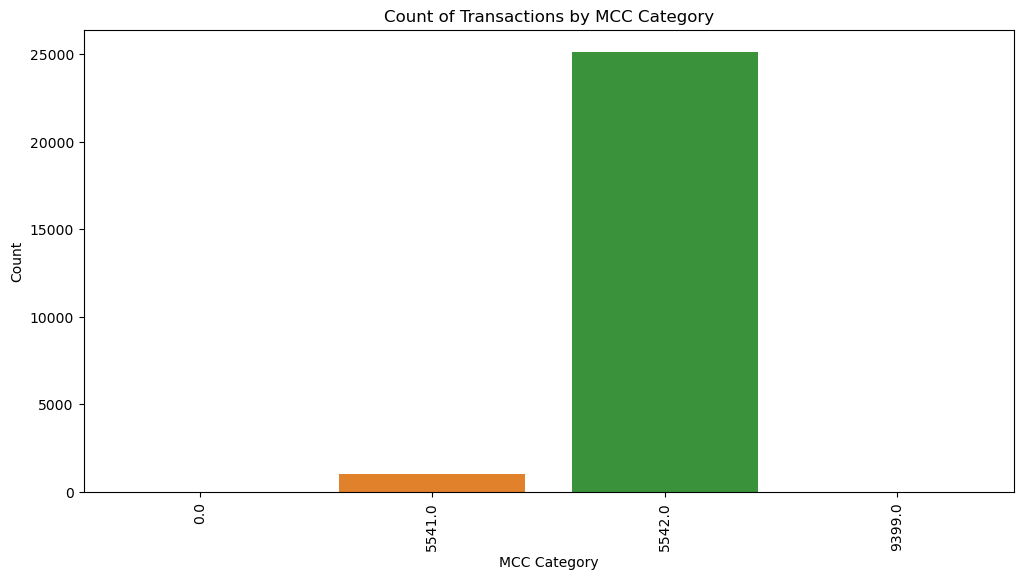

In [75]:
plt.figure(figsize=(12, 6))
sns.countplot(x='MCC Category', data=fuel_fusion_df)
plt.title('Count of Transactions by MCC Category')
plt.xlabel('MCC Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### Detect outliers by z-test

In [105]:
z_scores = stats.zscore(fuel_fusion_df['Gross Cost'])
outliers = fuel_fusion_df[(z_scores > 3) | (z_scores < -3)]
print("Number of outliers:", len(outliers))


Number of outliers: 633


###  Top 10 Merchants by Transaction Count

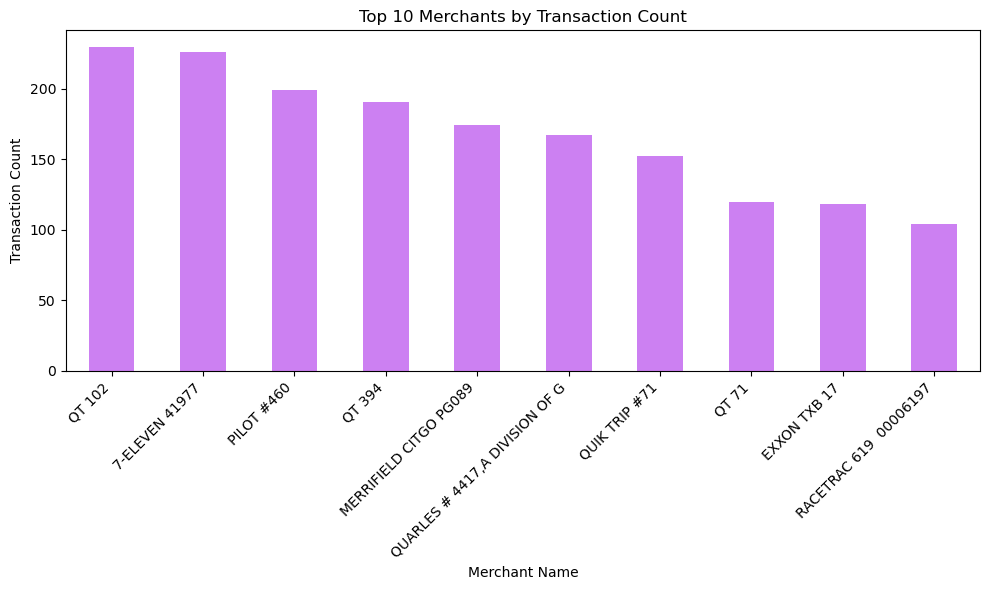

In [81]:
merchant_transaction_counts = fuel_fusion_df.groupby('Merchant Name')['Transaction Number'].count()
sorted_merchants = merchant_transaction_counts.sort_values(ascending=False)

# Select the top N merchants (change N to your desired number)
top_n = 10  # For example, top 10 merchants
top_merchants = sorted_merchants.head(top_n)

# Plot a bar chart
plt.figure(figsize=(10, 6))
light_color_rgb = (0.8, 0.5, 0.95)
top_merchants.plot(kind='bar', color= light_color_rgb)
plt.title(f'Top {top_n} Merchants by Transaction Count')
plt.xlabel('Merchant Name')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Transaction Amount Distribution by Merchant Category by Box and violin plot

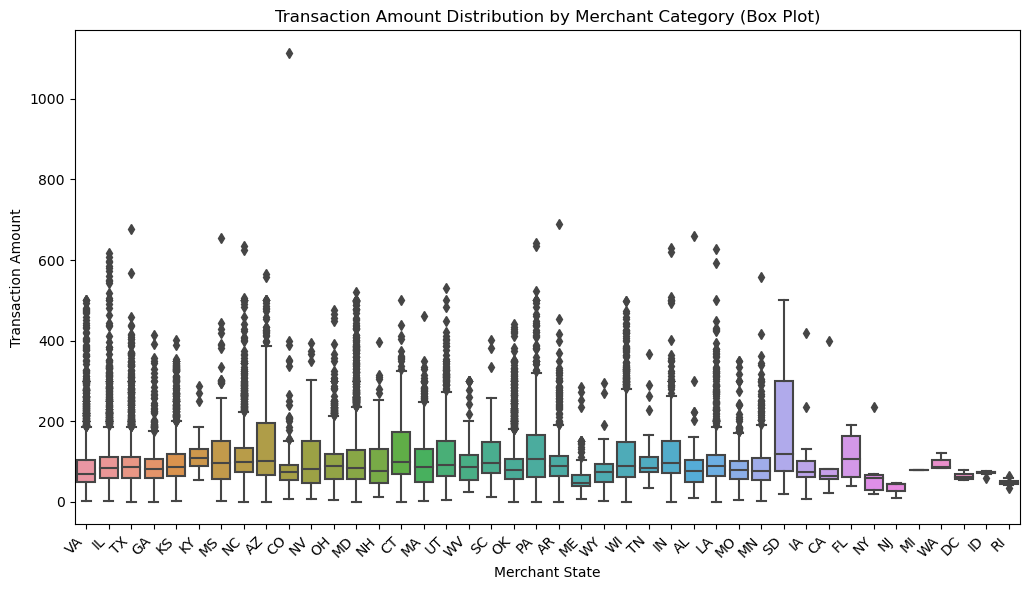

In [120]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)  
sns.boxplot(x='Merchant State', y='Gross Cost', data=fuel_fusion_df)
plt.title('Transaction Amount Distribution by Merchant Category (Box Plot)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Merchant State')
plt.ylabel('Transaction Amount')

plt.tight_layout()
plt.show()

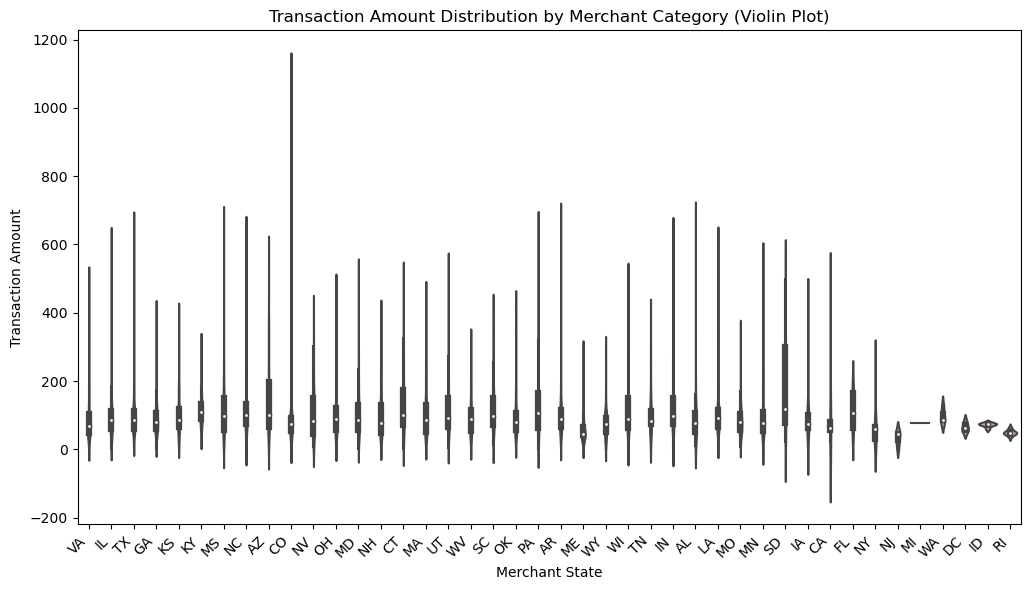

In [119]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 2)  # Subplot 2 for the violin plot
sns.violinplot(x='Merchant State', y='Gross Cost', data=fuel_fusion_df)
plt.title('Transaction Amount Distribution by Merchant Category (Violin Plot)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Merchant State')
plt.ylabel('Transaction Amount')

plt.tight_layout()
plt.show()